In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 54.84,
  'feels_like': 54.39,
  'temp_min': 51.94,
  'temp_max': 57.04,
  'pressure': 1013,
  'humidity': 93},
 'visibility': 8047,
 'wind': {'speed': 26.46, 'deg': 190, 'gust': 37.98},
 'rain': {'1h': 3.55},
 'clouds': {'all': 100},
 'dt': 1645588244,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1645529449,
  'sunset': 1645568699},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [7]:
boston_data = city_weather.json()

In [8]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 57.04 93 100 26.46


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | lakatoro
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | yar-sale
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | chara
Processing Record 7 of Set 1 | tupik
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | usolye-sibirskoye
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | guarap

Processing Record 40 of Set 4 | asau
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | kuliyapitiya
Processing Record 43 of Set 4 | tieli
Processing Record 44 of Set 4 | arklow
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | xai-xai
Processing Record 47 of Set 4 | jinchang
Processing Record 48 of Set 4 | amga
Processing Record 49 of Set 4 | borgarnes
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | shahreza
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | antsohihy
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | talakan
Processing Record 7 of Set 5 | olenino
Processing Record 8 of Set 5 | adrar
Processing Record 9 of Set 5 | miranorte
City not found. Skipping...
Processing Record 10 of Set 5 | salinas
Processing Record 11 of Set 5 | mocuba
Processing Record 12 of

Processing Record 31 of Set 8 | ha tinh
Processing Record 32 of Set 8 | fare
Processing Record 33 of Set 8 | saint anthony
Processing Record 34 of Set 8 | tarata
Processing Record 35 of Set 8 | araouane
Processing Record 36 of Set 8 | grimari
City not found. Skipping...
Processing Record 37 of Set 8 | norton
Processing Record 38 of Set 8 | bintulu
Processing Record 39 of Set 8 | gazanjyk
Processing Record 40 of Set 8 | shirokiy
Processing Record 41 of Set 8 | clyde
Processing Record 42 of Set 8 | mwinilunga
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | matagami
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | big rapids
Processing Record 47 of Set 8 | mawlamyine
Processing Record 48 of Set 8 | krasnoselkup
Processing Record 49 of Set 8 | eyl
Processing Record 50 of Set 8 | touros
Processing Record 1 of Set 9 | tete
Processing Record 2 of Set 9 | superior
Processing Record 3 of Set 9 | arefu
Processing Record 4 of Set 9 | sur
Processin

City not found. Skipping...
Processing Record 18 of Set 12 | tabou
Processing Record 19 of Set 12 | nemuro
Processing Record 20 of Set 12 | owando
Processing Record 21 of Set 12 | birao
Processing Record 22 of Set 12 | derzhavinsk
Processing Record 23 of Set 12 | acarau
Processing Record 24 of Set 12 | bayshore gardens
Processing Record 25 of Set 12 | tanabe
Processing Record 26 of Set 12 | klyuchi
Processing Record 27 of Set 12 | gambettola
Processing Record 28 of Set 12 | mao
Processing Record 29 of Set 12 | tadine
Processing Record 30 of Set 12 | alofi
Processing Record 31 of Set 12 | shubarshi
Processing Record 32 of Set 12 | yovon
Processing Record 33 of Set 12 | quimper
Processing Record 34 of Set 12 | nuuk
Processing Record 35 of Set 12 | okakarara
Processing Record 36 of Set 12 | southborough
Processing Record 37 of Set 12 | zholymbet
Processing Record 38 of Set 12 | praya
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.17,79,100,20.07,KI,2022-02-23 03:52:41
1,Lakatoro,-16.0999,167.4164,84.63,72,17,11.21,VU,2022-02-23 03:52:41
2,Albany,42.6001,-73.9662,59.61,95,100,12.86,US,2022-02-23 03:52:41
3,Yar-Sale,66.8333,70.8333,-13.36,100,63,5.84,RU,2022-02-23 03:52:42
4,Cockburn Town,21.4612,-71.1419,76.71,73,1,20.00,TC,2022-02-23 03:49:41
5,Chara,56.9064,118.2631,10.85,85,20,1.34,RU,2022-02-23 03:52:42
6,Tupik,54.4253,119.9327,16.29,76,57,2.59,RU,2022-02-23 03:52:43
7,Ilulissat,69.2167,-51.1000,-13.49,99,100,8.68,GL,2022-02-23 03:50:59
8,Pisco,-13.7000,-76.2167,71.65,88,100,3.44,PE,2022-02-23 03:52:43
9,Los Llanos De Aridane,28.6585,-17.9182,55.15,74,0,7.00,ES,2022-02-23 03:52:44


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
today = time.strftime('%x')
today

'02/22/22'

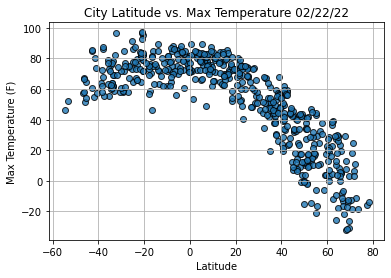

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

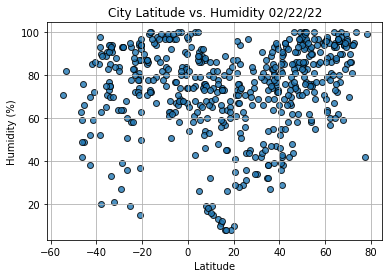

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

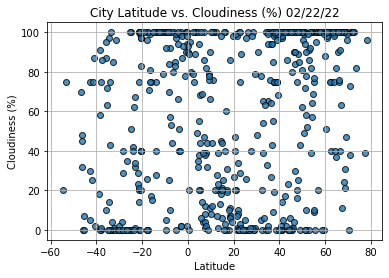

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

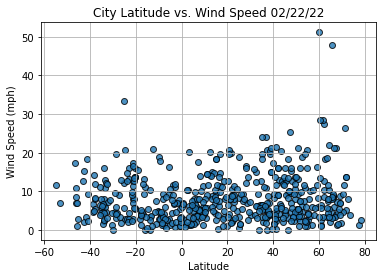

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

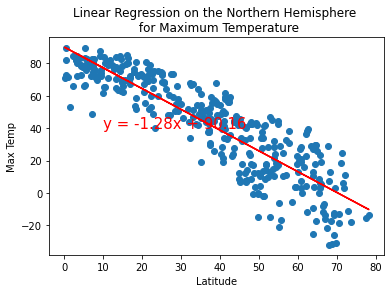

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

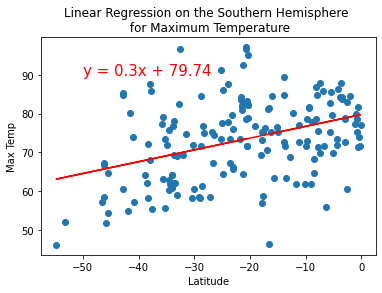

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

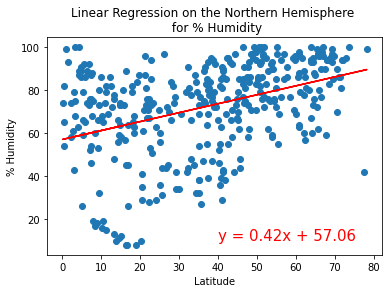

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

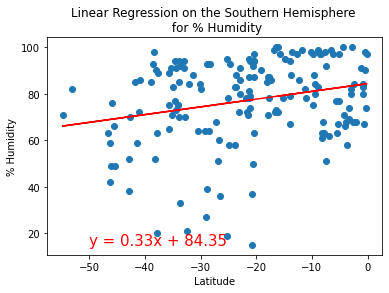

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

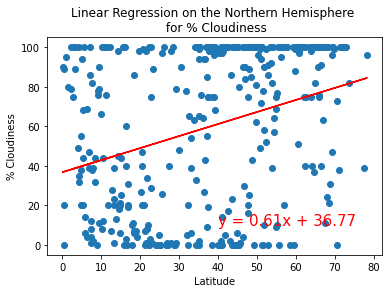

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

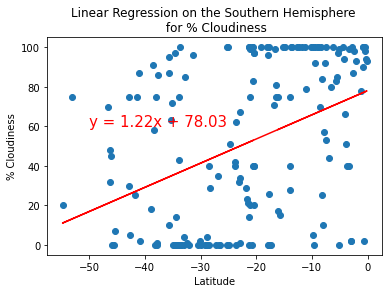

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

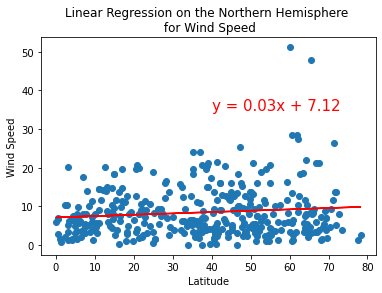

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

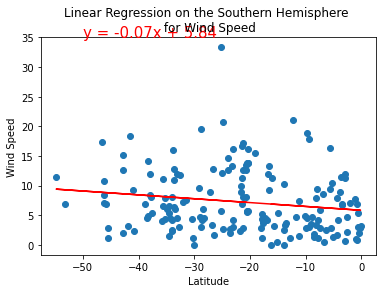

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))